In the column "Name" of HMXB_cat_Neumann catalog, on row 175 to 192 of kim_persistent, i have elements i want to split by simple spaces, but the names are in the second column once split the columns. In third place, in kim_transient between 304 and 367 i do have names in the "Names" column. Also, in malacaria_persistent and malacaria_transient the names of the objects are in the column named "Sources", while in the v2023-09-Fortin catalog the names are in "Main_ID" column. This is useful to know whether all the objects are in the four catalogs. 

In [1]:
%matplotlib widget

C:\Users\Acer\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### kim_transient Catalog with it's names (Here the Kim catalog is divided in two: transient and persistent, as malacaria catalog is).

In [2]:
import pandas as pd
import numpy as np
import re
from IPython.display import Image, display
from mpl_toolkits.basemap import Basemap
import matplotlib.image as mpimg
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import seaborn as sns


nombre_excel = "HMXB_catalogs.xlsx"

kim_transient = pd.read_excel(nombre_excel, sheet_name="kim_transient")
columna_kim_t = kim_transient.iloc[302:367, 0]
df_kim_t = columna_kim_t.str.split(expand=True)
nombres_kim_t = df_kim_t[1] + " " + df_kim_t[2]

### Kim_persistent Catalog with it's names.

In [3]:
kim_persistent = pd.read_excel(nombre_excel, sheet_name="kim_persistent")
columna_kim_p = kim_persistent.iloc[173:192, 0]
df_kim_p = columna_kim_p.str.split(expand=True)
nombres_kim_p = df_kim_p[1] + " " + df_kim_p[2]

### HMXB_cat_Neumann Catalog with it's names.

In [4]:
cat_neuman = pd.read_excel(nombre_excel, sheet_name="HMXB_cat_Neumann")
nombres_neuman = cat_neuman["Name"]

### Malacaria_persistent Catalog with it's names.

In [5]:
malacaria_persistent = pd.read_excel(nombre_excel, sheet_name="malacaria_persistent")
columna_sources = malacaria_persistent["Source"]
nombres_malacaria_persistent = columna_sources.iloc[1:].str.replace(r"\s*\(.*?\)", "", regex=True)

### Malacaria_transient Catalog with it's names.

In [6]:
malacaria_transient = pd.read_excel(nombre_excel, sheet_name="malacaria_transient")
columna_sources_transient = malacaria_transient["Source"]
nombres_malacaria_transient = columna_sources_transient.iloc[1:].str.replace(r"\s*\(.*?\)", "", regex=True)

### v2023_09_Fortin Catalog with it's names. 

In [7]:
v2023_09_Fortin = pd.read_excel(nombre_excel, sheet_name="v2023-09_Fortin")
columna_main_id = v2023_09_Fortin["Main_ID"]
nombres_fortin = columna_main_id.str.replace(r"\s*\(.*?\)", "", regex=True)

### As we will see later, there is no binary system simultaneously on six "catalogs", because there aren't 6 at all (just four catalogs, which two of them are divided by two: transient and persistent).

In [8]:
todas_las_nombres = pd.Series(
    list(nombres_kim_t) + list(nombres_kim_p) + list(nombres_neuman) + 
    list(nombres_malacaria_persistent) + list(nombres_malacaria_transient) + 
    list(nombres_fortin)
)

conteo_nombres = todas_las_nombres.value_counts()
elementos_en_dos_o_mas_catalogos = conteo_nombres[conteo_nombres >= 2]

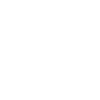

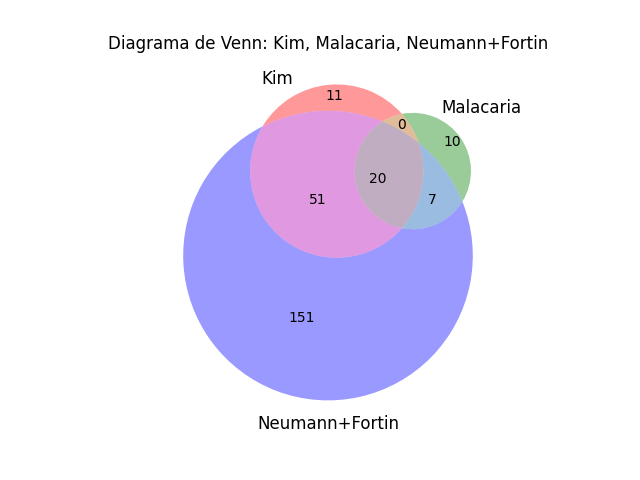

In [9]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

kim = set(nombres_kim_t) | set(nombres_kim_p)
malacaria = set(nombres_malacaria_transient) | set(nombres_malacaria_persistent)
neumann = set(nombres_neuman)
fortin = set(nombres_fortin)

neumann_fortin = neumann | fortin

venn_diagram = venn3(
    subsets=(
        len(kim - malacaria - neumann_fortin),
        len(malacaria - kim - neumann_fortin),
        len(kim & malacaria - neumann_fortin),
        len(neumann_fortin - kim - malacaria),
        len(kim & neumann_fortin - malacaria),
        len(malacaria & neumann_fortin - kim),
        len(kim & malacaria & neumann_fortin)
    ),
    set_labels=("Kim", "Malacaria", "Neumann+Fortin")
)

plt.title("Diagrama de Venn: Kim, Malacaria, Neumann+Fortin")
plt.figure(figsize=(1, 1))  # Ajustar el tamaño de la imagen
plt.show()


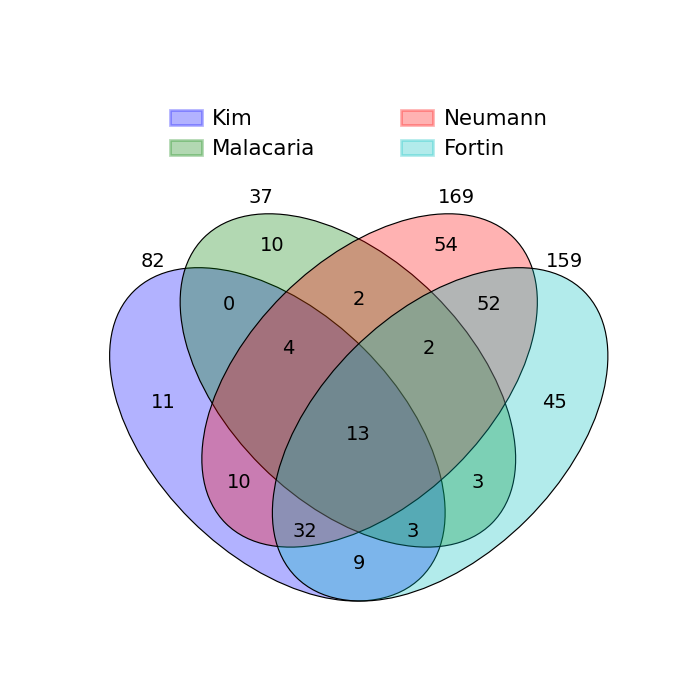

In [10]:
from venny4py.venny4py import *

sets = {
    'Kim': set(nombres_kim_t) | set(nombres_kim_p),  # Conjunto Kim
    'Malacaria': set(nombres_malacaria_transient) | set(nombres_malacaria_persistent),  # Conjunto Malacaria
    'Neumann': set(nombres_neuman),  # Conjunto Neumann
    'Fortin': set(nombres_fortin)  # Conjunto Fortin
}

venny4py(sets=sets)

### Now we gonna see the distribution in Neumann Catalog for objects of it that are present in 1, 2, 3 or all of 4 catalogs in a RA (right ascension) versus DEC (declination).

In [11]:
kim_combined = pd.concat([
    pd.read_excel(nombre_excel, sheet_name="kim_transient").iloc[302:367, 0],
    pd.read_excel(nombre_excel, sheet_name="kim_persistent").iloc[173:192, 0]
]).str.split(expand=True).apply(lambda x: ' '.join(x[1:3]), axis=1)

malacaria_combined = pd.concat([
    pd.read_excel(nombre_excel, sheet_name="malacaria_persistent")["Source"].iloc[1:].str.replace(r"\s*\(.*?\)", "", regex=True),
    pd.read_excel(nombre_excel, sheet_name="malacaria_transient")["Source"].iloc[1:].str.replace(r"\s*\(.*?\)", "", regex=True)
])

todos_los_nombres = pd.Series(
    list(kim_combined) + list(malacaria_combined) + list(nombres_neuman) + list(nombres_fortin)
)

conteo_nombres = todos_los_nombres.value_counts()

elementos_en_cuatro_catalogos = conteo_nombres[conteo_nombres >= 4]
elementos_en_cuatro_catalogos = elementos_en_cuatro_catalogos.index.tolist()
print("The systems present in four catalogs are ",len(elementos_en_cuatro_catalogos), elementos_en_cuatro_catalogos)

The systems present in four catalogs are  13 ['MAXI J1409-619', 'IGR J19294+1816', 'GRO J1008-57', 'GRO J2058+42', 'EXO 2030+375', '4U 1901+03', 'OAO 1657-415', 'XTE J1858+034', 'KS 1947+300', 'XTE J1946+274', 'GRO J1750-27', 'XTE J1859+083', 'SAX J2103.5+4545']


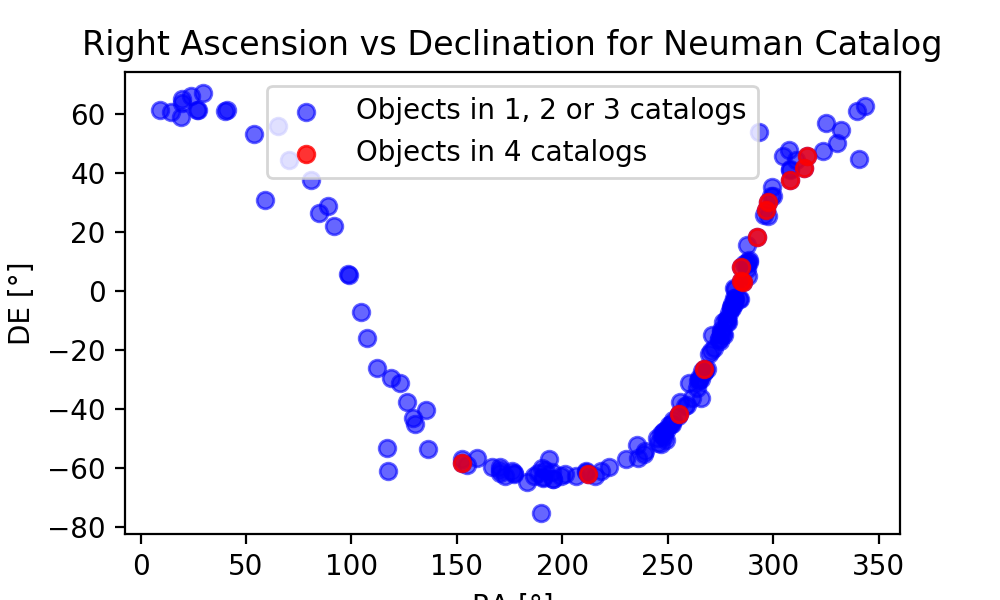

In [12]:
ra_deg = cat_neuman["RAdeg"]
de_deg = cat_neuman["DEdeg"]

coordenadas_comunes = cat_neuman[cat_neuman["Name"].isin(elementos_en_cuatro_catalogos)][["RAdeg", "DEdeg"]]
plt.figure(figsize=(5, 3))

plt.scatter(ra_deg, de_deg, marker='o', color='blue', alpha=0.6, label='Objects in 1, 2 or 3 catalogs')
plt.scatter(coordenadas_comunes["RAdeg"], coordenadas_comunes["DEdeg"], marker='o', color='red', alpha=0.8, label='Objects in 4 catalogs')

plt.title("Right Ascension vs Declination for Neuman Catalog")
plt.xlabel("RA [°]")
plt.ylabel("DE [°]")
plt.legend()
plt.show()